# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [2]:
!pip install -i https://pypi.mirrors.ustc.edu.cn/simple labelme tensorflow==2.10.1 tensorflow-gpu==2.10.1 opencv-python matplotlib albumentations

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/36/41/b83675d84a8b45095d2deba810cf57540df6db299bed5539eb727d3ca9b0/labelme-5.2.1.tar.gz (1.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/ad/87/f484e0b86687c97d2dfb081e03e948b796561fc8608b409a9366e3b4a663/tensorflow-2.10.1-cp310-cp310-win_amd64.whl (455.9 MB)
                                              0.0/455.9 MB ? eta -:--:--
                                              0.0/455.9 MB ? eta -:--:--
                                              0.0/455.9 MB ? eta -:--:--
                                              0.0/

In [78]:
!pip install -i https://pypi.mirrors.ustc.edu.cn/simple labelme==5.1.1

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 100.9 kB/s eta 0:00:15
                                              0.0/1.5 MB 100.9 kB/s eta 0:00:15
                                              0.0/1.5 MB 100.9 kB/s eta 0:00:15
     -                                        0.0/1.5 MB 98.5 kB/s eta 0:00:15
     -                                        0.0/1.5 MB 98.5 kB/s eta 0:00:15
     -                                        0.0/1.5 MB 98.5 kB/s eta 0:00:15
     -                               

### 1.2 Collect Images Using OpenCV

In [121]:
import os
import time
import uuid
import cv2

In [122]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [140]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(imgnum)}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [141]:
!labelme

# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [142]:
#To use CPU, run this code
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Set visible GPUs to -1 (none)
import tensorflow as tf

In [143]:
# import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [150]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [144]:
# tf.config.list_physical_devices('GPU')
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### 2.3 Load Image into TF Data Pipeline

In [145]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [146]:
images.as_numpy_iterator().next()

b'data\\images\\11.jpg'

In [147]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [148]:
images = images.map(load_image)

In [149]:
images.as_numpy_iterator().next()

array([[[138, 138, 110],
        [138, 138, 110],
        [138, 138, 110],
        ...,
        [138, 133, 127],
        [140, 133, 127],
        [141, 134, 128]],

       [[138, 138, 110],
        [138, 138, 110],
        [138, 138, 110],
        ...,
        [137, 132, 126],
        [139, 132, 126],
        [140, 133, 127]],

       [[140, 140, 114],
        [139, 139, 113],
        [140, 140, 114],
        ...,
        [135, 132, 125],
        [136, 131, 125],
        [137, 132, 126]],

       ...,

       [[ 51,  79, 100],
        [ 53,  81, 102],
        [ 54,  82, 103],
        ...,
        [ 91,  75,  86],
        [ 84,  71,  81],
        [ 83,  70,  80]],

       [[ 49,  77,  99],
        [ 51,  79, 101],
        [ 53,  81, 102],
        ...,
        [ 90,  77,  86],
        [ 85,  72,  81],
        [ 82,  69,  78]],

       [[ 46,  74,  96],
        [ 48,  76,  98],
        [ 51,  79, 100],
        ...,
        [ 92,  79,  88],
        [ 86,  73,  82],
        [ 82,  69,  78]]

In [150]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### 2.4 View Raw Images with Matplotlib

In [151]:
image_generator = images.batch(4).as_numpy_iterator()

In [152]:
plot_images = image_generator.next()

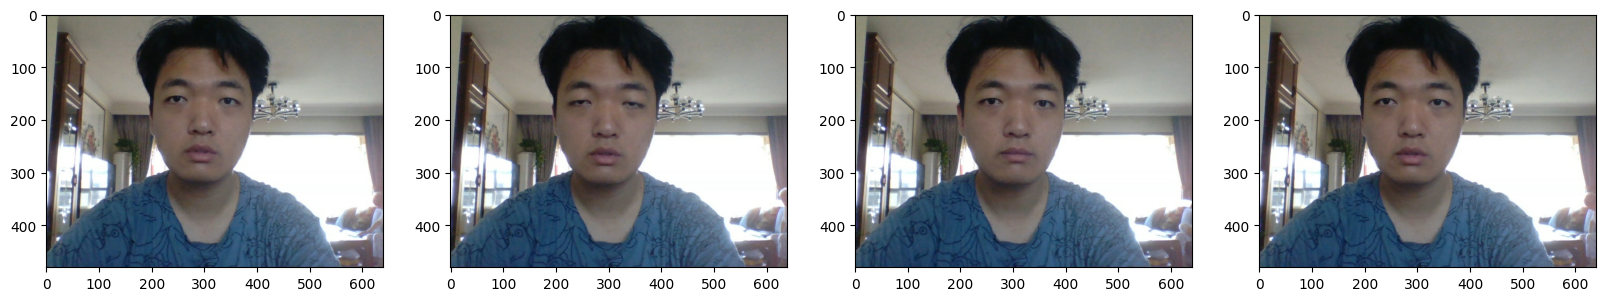

In [153]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [156]:
30*.6 # 18 to train

18.0

In [157]:
30*.2 # 6 to test and val

6.0

### 3.2 Move the Matching Labels

In [158]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [159]:
import albumentations as alb

In [160]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [161]:
img = cv2.imread(os.path.join('data','train', 'images','12.jpg'))

In [162]:
with open(os.path.join('data', 'train', 'labels', '12.json'), 'r') as f:
    label = json.load(f)

In [163]:
label['shapes'][0]['points']

[[197.8688524590164, 31.803278688524614],
 [415.3551912568306, 320.327868852459]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [164]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [165]:
coords

[197.8688524590164, 31.803278688524614, 415.3551912568306, 320.327868852459]

In [166]:
coords = list(np.divide(coords, [640,480,640,480]))

In [168]:
coords #0.31<0.64; 0.06<0.66

[0.30917008196721313,
 0.06625683060109294,
 0.6489924863387978,
 0.6673497267759563]

### 4.4 Apply Augmentations and View Results

In [169]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [170]:
augmented['bboxes'][0][2:]

(0.5630115361262903, 0.6962841530054644)

In [171]:
augmented['bboxes']

[(0.07970856102003647,
  0.055118397085610255,
  0.5630115361262903,
  0.6962841530054644)]

In [172]:
augmented['bboxes'][0][2:]

(0.5630115361262903, 0.6962841530054644)

In [173]:
augmented['bboxes'][0][:2]

(0.07970856102003647, 0.055118397085610255)

In [174]:
np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)

array([253, 313])

In [175]:
np.multiply(augmented['bboxes'][0][:2], [450,450])

array([35.86885246, 24.80327869])

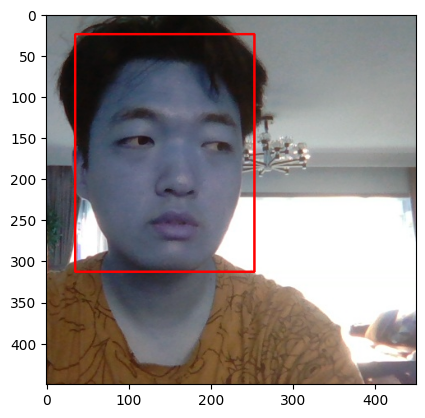

In [176]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [177]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
        label_dir = os.path.join('aug_data', partition, 'labels')
        os.makedirs(label_dir, exist_ok=True)  # create directory if not exists
        

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                label_dir_2 = os.path.join('aug_data', partition, 'images')
                os.makedirs(label_dir_2, exist_ok=True)  # create directory if not exists
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

### 5.2 Load Augmented Images to Tensorflow Dataset

In [178]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [179]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [180]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [181]:
train_images.as_numpy_iterator().next()

array([[[0.48229167, 0.49074754, 0.43180147],
        [0.4841299 , 0.49197304, 0.4488358 ],
        [0.4862745 , 0.49411765, 0.44607842],
        ...,
        [0.4889093 , 0.5124387 , 0.49675244],
        [0.49754903, 0.5142157 , 0.5088235 ],
        [0.5064951 , 0.51617646, 0.5122549 ]],

       [[0.49117646, 0.49375   , 0.4483456 ],
        [0.49019608, 0.49460784, 0.4617647 ],
        [0.4862745 , 0.49411765, 0.4509804 ],
        ...,
        [0.49895832, 0.52254903, 0.50667894],
        [0.511826  , 0.5211397 , 0.5070466 ],
        [0.5042892 , 0.5194853 , 0.50784314]],

       [[0.49215686, 0.49460784, 0.44264707],
        [0.4862745 , 0.49411765, 0.45      ],
        [0.48272058, 0.49056372, 0.43958333],
        ...,
        [0.49454656, 0.518076  , 0.5023897 ],
        [0.50349265, 0.5231005 , 0.49957108],
        [0.5205882 , 0.52843136, 0.5088235 ]],

       ...,

       [[0.05      , 0.17218137, 0.34932598],
        [0.05238971, 0.16525735, 0.3382353 ],
        [0.05992647, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [182]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [183]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [184]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [185]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [186]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1324 , 0.01938, 0.584  , 0.6133 ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [187]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1080, 1080, 360, 360, 360, 360)

### 7.2 Create Final Datasets (Images/Labels)

In [188]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [189]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [190]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [191]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2788  , 0.      , 0.7036  , 0.651   ],
        [0.143   , 0.00804 , 0.575   , 0.6494  ],
        [0.1481  , 0.291   , 0.5913  , 0.947   ],
        [0.4045  , 0.00946 , 0.8394  , 0.6763  ],
        [0.4065  , 0.013695, 0.846   , 0.662   ],
        [0.1724  , 0.277   , 0.628   , 0.9478  ],
        [0.2815  , 0.288   , 0.7197  , 0.921   ],
        [0.4128  , 0.2659  , 0.8584  , 0.936   ]], dtype=float16))

### 7.3 View Images and Annotations

In [192]:
data_samples = train.as_numpy_iterator()

In [193]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


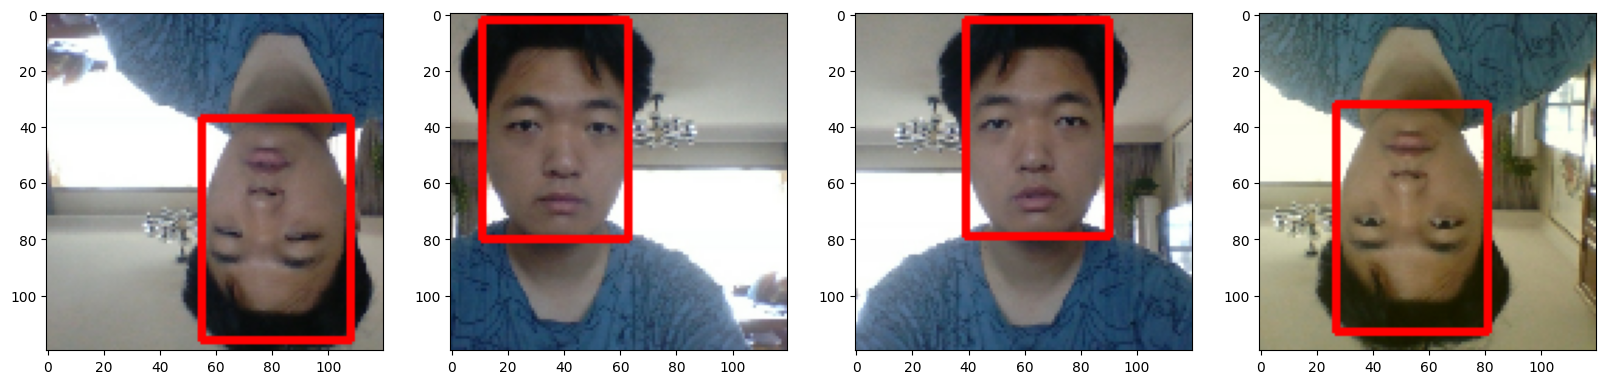

In [194]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [195]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [196]:
vgg = VGG16(include_top=False)

In [197]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [198]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [199]:
facetracker = build_model()

In [200]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_5[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [201]:
X, y = train.as_numpy_iterator().next()

In [202]:
X.shape

(8, 120, 120, 3)

In [203]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 345ms/step


In [204]:
classes, coords

(array([[0.5252778 ],
        [0.5167657 ],
        [0.5735718 ],
        [0.5481348 ],
        [0.5609005 ],
        [0.5309508 ],
        [0.5830515 ],
        [0.55139893]], dtype=float32),
 array([[0.5157785 , 0.4548759 , 0.51850957, 0.39474168],
        [0.4585631 , 0.58119375, 0.5610985 , 0.43992984],
        [0.4371392 , 0.5080093 , 0.5084249 , 0.44144645],
        [0.4918882 , 0.40126577, 0.5412143 , 0.3790988 ],
        [0.4877489 , 0.5299266 , 0.5594553 , 0.4163522 ],
        [0.43359017, 0.41311076, 0.5284332 , 0.37378246],
        [0.42574015, 0.5152698 , 0.47348964, 0.4198848 ],
        [0.47270566, 0.550598  , 0.5481619 , 0.44662264]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [205]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [206]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [207]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [208]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [209]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.1249485>

In [210]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.60089654>

In [211]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.1249485>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [212]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [213]:
model = FaceTracker(facetracker)

In [214]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [215]:
logdir='logs'

In [216]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [217]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


135/135 [==============================] - 106s 769ms/step - total_loss: 0.1658 - class_loss: 0.0210 - regress_loss: 0.1553 - val_total_loss: 0.0476 - val_class_loss: 2.0718e-04 - val_regress_loss: 0.0475
Epoch 2/30
135/135 [==============================] - 104s 769ms/step - total_loss: 0.0213 - class_loss: 9.2900e-05 - regress_loss: 0.0213 - val_total_loss: 0.0209 - val_class_loss: 1.7457e-05 - val_regress_loss: 0.0209
Epoch 3/30
135/135 [==============================] - 105s 771ms/step - total_loss: 0.0162 - class_loss: 2.1318e-05 - regress_loss: 0.0162 - val_total_loss: 0.0156 - val_class_loss: 7.7785e-06 - val_regress_loss: 0.0156
Epoch 4/30
135/135 [==============================] - 105s 770ms/step - total_loss: 0.0131 - class_loss: 1.4375e-05 - regress_loss: 0.0130 - val_total_loss: 0.0224 - val_class_loss: 8.0616e-06 - val_regress_loss: 0.0224
Epoch 5/30
135/135 [==============================] - 104s 769ms/step - total_loss: 0.0134 - class_loss: 1.2703e-05 - regress_loss: 0.0

### 10.3 Plot Performance

In [218]:
hist.history

{'total_loss': [0.023369671776890755,
  0.02474229596555233,
  0.013825275003910065,
  0.011165780946612358,
  0.011584006249904633,
  0.008583691902458668,
  0.014487922191619873,
  0.007461578585207462,
  0.008546719327569008,
  0.01275056041777134,
  0.007764131762087345,
  0.0040681990794837475,
  0.009556138888001442,
  0.011313884519040585,
  0.007872486487030983,
  0.009674818255007267,
  0.010304399766027927,
  0.005220489110797644,
  0.0054566096514463425,
  0.0032685387413948774,
  0.0072286734357476234,
  0.007018652744591236,
  0.00597792724147439,
  0.0020369524136185646,
  0.0052431984804570675,
  0.0036143511533737183,
  0.0032522031106054783,
  0.003232869552448392,
  0.002630997449159622,
  0.004073154181241989],
 'class_loss': [0.0001302621531067416,
  2.5555986212566495e-05,
  1.3403716366156004e-05,
  6.496934474853333e-06,
  4.515064574661665e-06,
  5.12602309754584e-06,
  5.5954114941414446e-06,
  3.4570773550512968e-06,
  5.13347185915336e-06,
  3.650795861176448

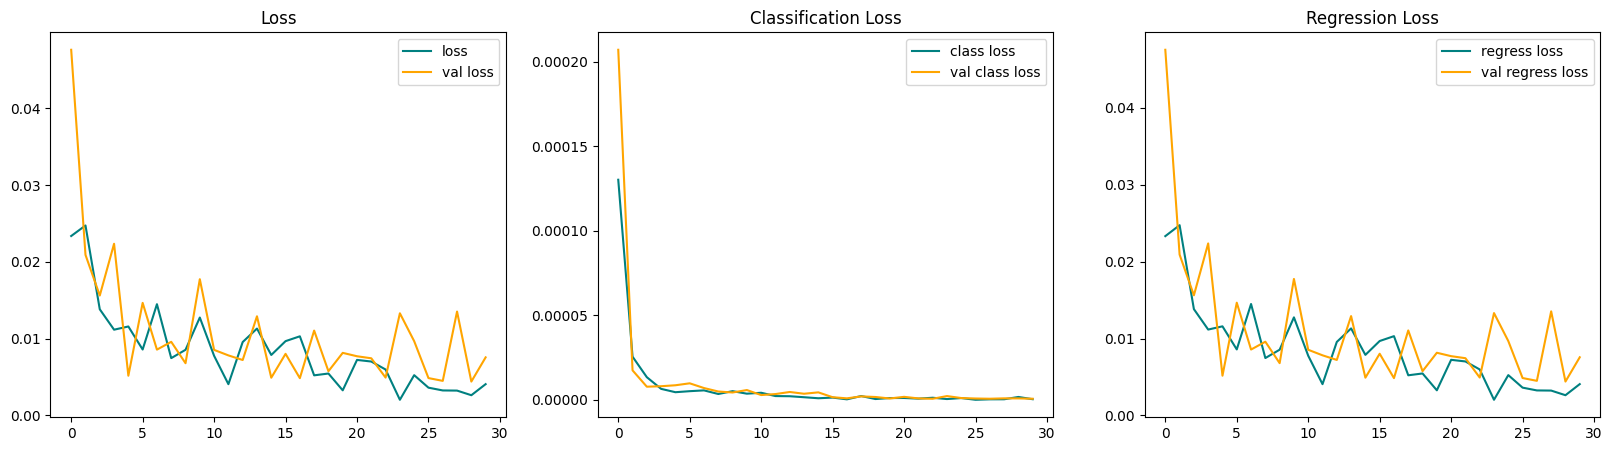

In [219]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [220]:
test_data = test.as_numpy_iterator()

In [221]:
test_sample = test_data.next()

In [222]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 232ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


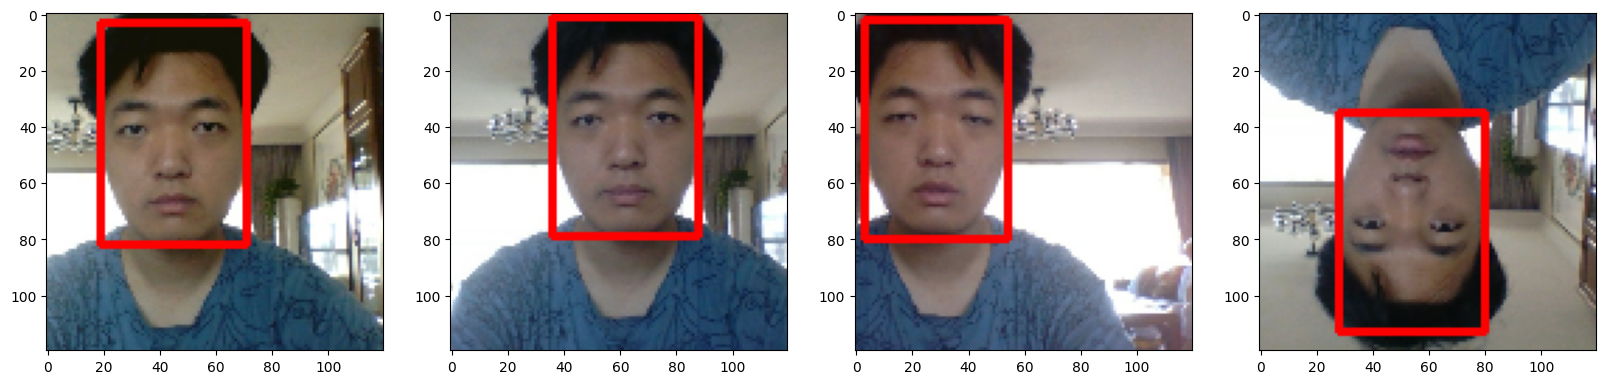

In [223]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [224]:
from tensorflow.keras.models import load_model

In [225]:
facetracker.save('facetracker.h5')

In [226]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [227]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 73ms/step


KeyboardInterrupt: 

In [228]:
cap.release()
cv2.destroyAllWindows()